## Université Paris-Sud 
## Info 114 Introduction to Data Science -- Fall 2019
# Project 4: DATA REPRESENTATION

In this project you will try to improve the data representation by creating new features (feature construction), selecting the best features (feature selection) or combining features to create a smaller subset of better features (space dimensionality reduction).

In [1]:
# Load general libraries
import os, re
from glob import glob as ls
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns; sns.set()
from PIL import Image
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")
from sys import path

In [2]:
# Import the instructors' utilities
code_dir = '../utilities'
path.append(code_dir); 
from utilities import *
# ... and YOUR OWN functions (you will have to edit the file mycode.py)
from mycode import *

# Step 1: Loading data

In [4]:
data_dir = '../mini-dataset/crop_data/'
a_files = get_files(data_dir, 'a')
b_files = get_files(data_dir, 'b')
all_files = a_files+b_files

ORIGINAL IMAGES


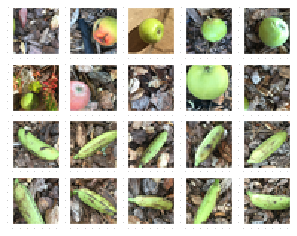

In [5]:
# Show a few images
some_a_files = a_files[0:10]
some_b_files = b_files[0:10]
some_files = some_a_files+some_b_files
print('CROPPED IMAGES')
show_images(some_files)

## Steps 2: Creating a representation
You are going to extract some features of your own. One way it to apply various filters like in classe. This is best done on a small subset of files first.

DIFFERENCE FILTER


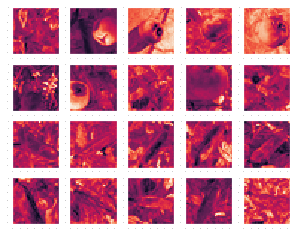

In [7]:
print('DIFFERENCE FILTER')
show_images(some_files, difference_filter)

VALUE FILTER


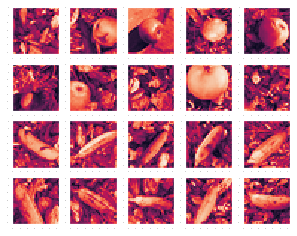

In [8]:
print('VALUE FILTER')
show_images(some_files, value_filter)

FOREGROUND FILTER


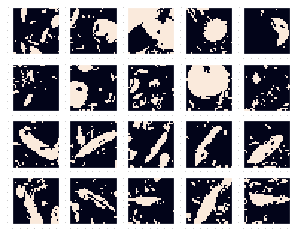

In [9]:
print('FOREGROUND FILTER')
show_images(some_files, foreground_filter)

TRANSPARENT BACKGROUND FILTER


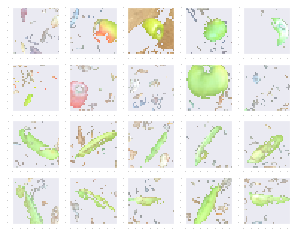

In [11]:
print('TRANSPARENT BACKGROUND FILTER')
show_images(some_files, transparent_background_filter)

### Write a function of your own to extract features like `redness` and `elongation` and call it "extract_features", the put the code in `mycode.py`. For inspiration, see `utilities.py`.

## Preprocessing and visualizing all the data
Now we apply extract_features to all samples.
Create a data array X with all samples (from a_files and b_files) 
in lines and features (redness and elongation) in column. 
Also create a column array with the `truth values`, +1 for Apple and -1 for Banana.

For debug purposes, use a subset of the data: "some_a_files" and "same_b_files".

In [12]:
X, Y = preprocess_data(some_a_files, some_b_files, extract_features, standardize=True)

In [13]:
# Show the values in X and Y
pretty_print(X, Y, column_names=['redness', 'elongation', 'fruit'])

,redness,elongation,fruit
0,-0.208052,-0.323320,1.0
1,1.731403,0.754402,1.0
2,2.488694,0.206953,1.0
3,-1.274859,1.020749,1.0
4,-1.646389,1.990096,1.0
5,1.345700,-0.284684,1.0
6,1.272731,-0.917129,1.0
7,-0.580097,-1.470282,1.0
8,-0.494389,-1.422601,1.0
9,-0.869877,-1.416058,1.0


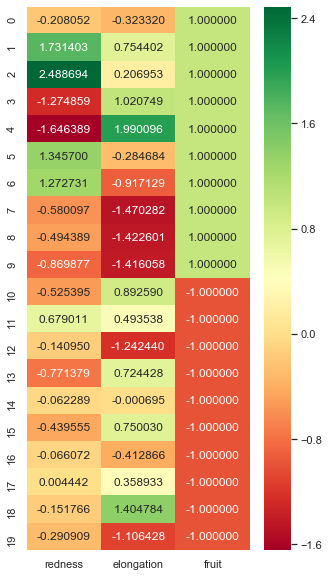

In [14]:
# Show the values as a heat map
heat_map(X, Y, column_names=['redness', 'elongation', 'fruit'])

## Process the entire dataset
Note: Do not standardize the data, this will be left up to the user.

In [29]:
X, Y = preprocess_data(a_files, b_files, extract_features)
print(X.shape, Y.shape)

(491, 2) (491, 1)


In [33]:
# Save the data
my_data_dir = './my_dataset/'
file_name = os.path.join(my_data_dir, 'RE_data.csv') # Redness Elongation (RE) features
data_to_csv(X, Y, file_name, ['redness', 'elongation', 'fruit'])

,redness,elongation,fruit
0,8.429612,1.403201,1.0
1,42.896078,1.703201,1.0
2,56.354067,1.550811,1.0
3,-10.528846,1.777343,1.0
4,-17.131387,2.047174,1.0
5,36.041667,1.413956,1.0
6,34.744932,1.237906,1.0
7,1.817919,1.083928,1.0
8,3.341065,1.097200,1.0
9,-3.331818,1.099021,1.0


## Making comparisons

In [34]:
data_list = ls(my_data_dir + '*_data.csv')
check_datasets(data_list)

,Dataset,num. examples,num. features,num. apples,num. bananas
0,RE,491,3,333,158
1,CS,491,22,333,158


In [36]:
# Load nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score as sklearn_metric
sklearn_model = KNeighborsClassifier(n_neighbors=3)

In [37]:
data_name = [os.path.basename(f)[:-9] for f in data_list]
all_data_df = [pd.read_csv(file) for file in data_list]
result = systematic_data_experiment(data_name, all_data_df, sklearn_model, sklearn_metric)
result.style.background_gradient(cmap='Blues')

KNEIGHBORSCLASSIFIER


,perf_tr,std_tr,perf_te,std_te
RE,0.813074,0.0230258,0.646744,0.0338204
CS,0.750034,0.015313,0.524517,0.0277645


## Feature selection
We are going to perform some simple-minded feature selection with the Pearson correlation coefficient. This will allow us to do some data visualization.

Let us first sort all features by the absolute value of the Pearson correlation coefficient. Indeed, variables are informative no matter whether they are correlated or anti-correlated (since it suffices to multiply them by -1 to change the correlation direction).

In [45]:
# Reload data as data frame
data_df = pd.read_csv(os.path.join(my_data_dir, 'CS_data.csv'))
data_df.head()

,R,G,B,M=maxRGB,m=minRGB,C=M-m,R-(G+B)/2,G-B,G-(R+B)/2,B-R,...,(G-B)/C,(B-R)/C,(R-G)/C,(R+G+B)/3,C/V,W,H,W/H,W*H,fruit
0,200.631068,193.495146,190.907767,205.354369,183.635922,21.718447,8.429612,2.587379,-2.274272,-9.723301,...,0.119133,-0.447698,0.328565,195.011327,0.111370,159.085788,113.373463,1.403201,18036.106721,1.0
1,212.400000,194.105882,144.901961,222.776471,137.756863,85.019608,42.896078,49.203922,15.454902,-67.498039,...,0.578736,-0.793911,0.215175,183.802614,0.462559,160.603213,94.294927,1.703201,15144.068336,1.0
2,203.693780,181.503987,113.175439,207.778309,113.175439,94.602871,56.354067,68.328549,23.069378,-90.518341,...,0.722267,-0.956824,0.234557,166.124402,0.569470,264.187824,170.354671,1.550811,45005.629862,1.0
3,168.534615,211.653846,146.473077,214.396154,142.392308,72.003846,-10.528846,65.180769,54.150000,-22.061538,...,0.905240,-0.306394,-0.598846,175.553846,0.410152,138.587386,77.974490,1.777343,10806.280695,1.0
4,201.299270,237.810219,199.051095,238.284672,193.218978,45.065693,-17.131387,38.759124,37.635036,-2.248175,...,0.860058,-0.049887,-0.810172,212.720195,0.211854,86.819317,42.409340,2.047174,3681.949959,1.0


In [46]:
# Compute correlation matrix
corr = data_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,R,G,B,M=maxRGB,m=minRGB,C=M-m,R-(G+B)/2,G-B,G-(R+B)/2,B-R,B-(G+R)/2,R-G,(G-B)/C,(B-R)/C,(R-G)/C,(R+G+B)/3,C/V,W,H,W/H,W*H,fruit
R,1,0.230917,0.141989,0.568864,0.202103,0.207796,0.723708,0.0529786,-0.294698,-0.603729,-0.359215,0.608775,-0.0826116,-0.575745,0.55764,0.67387,0.0947257,-0.210559,-0.402192,0.471636,-0.348155,-0.476703
G,0.230917,1,0.0841397,0.800924,0.165289,0.391509,-0.295664,0.639096,0.73833,-0.0980551,-0.416924,-0.631325,0.618388,0.176843,-0.611987,0.651075,0.273112,-0.403539,-0.483486,0.25564,-0.490145,-0.143687
B,0.141989,0.0841397,1,0.0964816,0.967587,-0.739104,-0.416593,-0.712626,-0.468299,0.70339,0.788702,0.0445683,-0.4437,0.420247,-0.0324783,0.651717,-0.812593,-0.439393,-0.428705,0.208371,-0.381748,-0.00239503
M=maxRGB,0.568864,0.800924,0.0964816,1,0.11324,0.566092,0.0948042,0.489412,0.41261,-0.330789,-0.458653,-0.199638,0.238917,0.0290046,-0.202554,0.72261,0.440219,-0.540955,-0.643551,0.346845,-0.656552,-0.187213
m=minRGB,0.202103,0.165289,0.967587,0.11324,1,-0.754935,-0.383412,-0.630476,-0.407254,0.63412,0.704223,0.0263152,-0.282308,0.289676,-0.0398773,0.703279,-0.837313,-0.399354,-0.411306,0.250534,-0.35431,-0.062311
C=M-m,0.207796,0.391509,-0.739104,0.566092,-0.754935,1,0.380684,0.846126,0.610231,-0.744451,-0.88701,-0.153603,0.391921,-0.221194,-0.100609,-0.10654,0.985265,-0.0257191,-0.083521,0.0210708,-0.13939,-0.0718711
R-(G+B)/2,0.723708,-0.295664,-0.416593,0.0948042,-0.383412,0.380684,1,0.113394,-0.36962,-0.855183,-0.530639,0.817917,-0.135402,-0.81355,0.80184,-0.0222006,0.37049,0.218525,0.0771373,0.202094,0.105202,-0.362515
G-B,0.0529786,0.639096,-0.712626,0.489412,-0.630476,0.846126,0.113394,1,0.881277,-0.611956,-0.902302,-0.478879,0.777847,-0.199868,-0.405795,-0.0446535,0.819493,0.0550438,-0.00949188,0.0191473,-0.0504246,-0.0993128
G-(R+B)/2,-0.294698,0.73833,-0.468299,0.41261,-0.407254,0.610231,-0.36962,0.881277,1,-0.165527,-0.591438,-0.836911,0.79186,0.20006,-0.760915,-0.0312005,0.590172,-0.0524674,-0.0455687,-0.0782228,-0.0971989,0.0795579
B-R,-0.603729,-0.0980551,0.70339,-0.330789,0.63412,-0.744451,-0.855183,-0.611956,-0.165527,1,0.893126,-0.401256,-0.298012,0.751876,-0.426586,0.0409676,-0.722442,-0.202667,-0.0564515,-0.170861,-0.0574372,0.340382


In [47]:
# Sort by correlation coefficient
sval = corr['fruit'][:-1].abs().sort_values(ascending=False)
ranked_columns = sval.index.values
print(ranked_columns) 

['R' '(B-R)/C' 'R-(G+B)/2' 'B-R' 'W/H' '(R+G+B)/3' 'R-G' 'B-(G+R)/2'
 '(R-G)/C' 'M=maxRGB' '(G-B)/C' 'G' 'H' 'G-B' 'W' 'G-(R+B)/2' 'W*H'
 'C=M-m' 'm=minRGB' 'C/V' 'B']


We notice that the features that we had constructed in previous lessons 'R-(G+B)/2' and 'W/H' come in the 5 top most informative features. But there are others. Let us make all scatter plots of pairs of features for the 5 top ranked features.

In [48]:
fruit_name = ['Banana', 'Apple']
fruit_list = [fruit_name[int((i+1)/2)] for i in data_df["fruit"].tolist()]

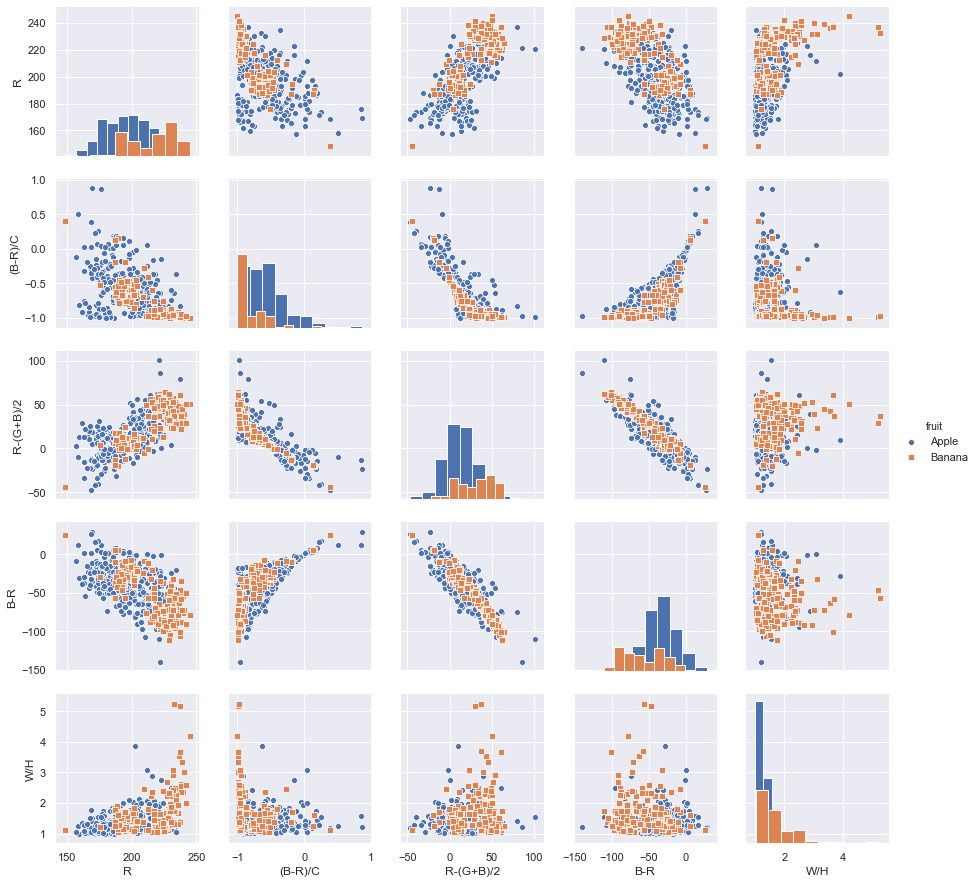

In [49]:
col_selected = ranked_columns[0:5]
df_new = pd.DataFrame.copy(data_df)
df_new = df_new[col_selected]
df_new['fruit'] = fruit_list
g = sns.pairplot(df_new, hue="fruit", markers=["o", "s"], diag_kind="hist")

It is interesting to see how many features are needed to obtain nearly as good performance as with all the features.

In [50]:
sklearn_model = KNeighborsClassifier(n_neighbors=3)
feat_lc_df = feature_learning_curve(data_df, sklearn_model, sklearn_metric)

KNEIGHBORSCLASSIFIER
['R' '(B-R)/C' 'R-(G+B)/2' 'B-R' 'W/H' '(R+G+B)/3' 'R-G' 'B-(G+R)/2'
 '(R-G)/C' 'M=maxRGB' '(G-B)/C' 'G' 'H' 'G-B' 'W' 'G-(R+B)/2' 'W*H'
 'C=M-m' 'm=minRGB' 'C/V' 'B']


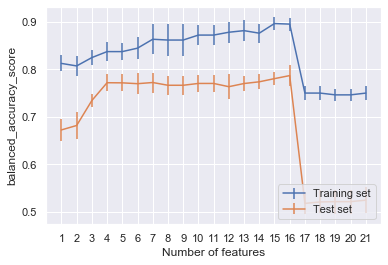

In [51]:
#feat_lc_df[['perf_tr', 'perf_te']].plot()
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_tr'], yerr=feat_lc_df['std_tr'], label='Training set')
plt.errorbar(feat_lc_df.index+1, feat_lc_df['perf_te'], yerr=feat_lc_df['std_te'], label='Test set')
plt.xticks(np.arange(1, 22, 1)) 
plt.xlabel('Number of features')
plt.ylabel(sklearn_metric.__name__)
plt.legend(loc='lower right')

We see the, with 5 features, it is about as good as it gets, given the error bars.

We can then investigate all pairs of features among the top 5 to see which pair is best.

In [52]:
range(5)

range(0, 5)

In [53]:
best_perf = -1
std_perf = -1
best_i = 0
best_j = 0
for i in np.arange(5): 
    for j in np.arange(i+1,5): 
        df = data_df[[ranked_columns[i], ranked_columns[j], 'fruit']]
        p_tr, s_tr, p_te, s_te = df_cross_validate(df, sklearn_model, sklearn_metric)
        if p_te > best_perf: 
            best_perf = p_te
            std_perf = s_te
            best_i = i
            best_j = i
            
metric_name = sklearn_metric.__name__.upper()
print('BEST PAIR: {}, {}'.format(best_i, best_j))
print("AVERAGE TEST {0:s} +- STD: {1:.2f} +- {2:.2f}".format(metric_name, p_te, s_te))

BEST PAIR: 0, 0
AVERAGE TEST BALANCED_ACCURACY_SCORE +- STD: 0.62 +- 0.04


Not too surprisingly the first two features are best. We can also run a different kind of feature selection, but the results are very similar.

In [54]:
# From https://scikit-learn.org/stable/modules/feature_selection.html
# 1.13.4.2. Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
X = data_df.iloc[:, :-1].to_numpy()
Y = data_df.iloc[:, -1].to_numpy()
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, Y)
ranked_columns = data_df.columns[np.argsort(-clf.feature_importances_)]
print(ranked_columns)

Index(['R', '(B-R)/C', 'G-(R+B)/2', '(G-B)/C', 'R-(G+B)/2', 'R-G', 'W', 'B-R',
       'W/H', 'G', '(R-G)/C', 'M=maxRGB', 'W*H', 'G-B', '(R+G+B)/3',
       'B-(G+R)/2', 'H', 'C/V', 'm=minRGB', 'B', 'C=M-m'],
      dtype='object')


# Conclusion
Always end with some conclusion. What did you learn? What could be improved?

## ALWAYS TERMINATE YOUR WORK WITH "RESTART AND RUN ALL".